In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy
import pandas as pn
from datetime import datetime

In [ ]:
CTD = xr.open_dataset('/Users/nyelab/Downloads/ocldb1617135921.23816_CTD.nc')


In [ ]:
ctd = xr.open_dataset('/Users/nyelab/Downloads/ocldb1618525892.26926_CTD.nc')

In [ ]:
np.shape(ctd.Temperature)


In [ ]:
xr.set_options(display_style=
              'text')

In [ ]:
ctd

In [ ]:
ctd

In [ ]:
TDF = pn.DataFrame(data = ctd.Temperature,columns=['temp'])


In [ ]:

TDF['depth'] = ctd.z


In [ ]:
TDF


In [ ]:

i=1
cast = CTD.casts[i]
lat = CTD.lat[i]
lon = CTD.lon[i]
time = CTD.time[i]
num = int(CTD.z_row_size[i].values)


In [ ]:
TDF['cast']

In [ ]:
Cast = np.empty(9496)
Year = np.empty(9496)
Month = np.empty(9496)
Day = np.empty(9496)
Lat = np.empty(9496)
Lon = np.empty(9496)

In [ ]:
a = 0
for i in range(726):
    cast = CTD.casts[i]
    lat = CTD.lat[i]
    lon = CTD.lon[i]
    year = pn.to_datetime(CTD.time[i].values).year
    month = pn.to_datetime(CTD.time[i].values).month
    day = pn.to_datetime(CTD.time[i].values).day
    num = int(CTD.z_row_size[i].values)
    Cast[a:a+num] = cast
    Year[a:a+num] = year
    Month[a:a+num] = month
    Day[a:a+num] = day
    Lat[a:a+num] = lat
    Lon[a:a+num] = lon
    a=a+num

In [ ]:
TDF['cast'] = Cast
TDF['year'] = Year
TDF['month'] = Month
TDF['day'] = Day
TDF['lat'] = Lat
TDF['lon'] = Lon

In [ ]:
TDF[30:60]

In [ ]:
pn.to_datetime(CTD.time[1].values)

In [ ]:
np.min(CTD.lon)

In [ ]:
test = xr.open_dataset('/Users/nyelab/Downloads/ocldb1618533792.17769.CTD/wod_020180637O.nc')


In [ ]:

ds = xr.open_dataset('/Users/nyelab/Downloads/ocldb1618533792.17769.CTD/wod_020180637O.nc')
ctd_df = pn.DataFrame(data = ds.Temperature, columns = ['temp'])
ctd_df['salt'] = ds.Salinity
Lon = ds.lon.values
Lat = ds.lat.values
year = pn.to_datetime(ds.time.values).year
month = pn.to_datetime(ds.time.values).month
day = pn.to_datetime(ds.time.values).day
ctd_df['year']=year
ctd_df['month']=month
ctd_df['day']=day
ctd_df['lat']=Lat
ctd_df['lon']=Lon
ds.close()

In [86]:
data = pn.DataFrame(data=np.empty([8,8]),columns = ['depth','temp','salt','lat','lon','year','month','day'])

In [87]:
data

,depth,temp,salt,lat,lon,year,month,day
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
import os

In [88]:
#Opening the CTD data 2018-2021 WOD
for i in os.listdir("/Users/nyelab/Downloads/ocldb1618533792.17769.CTD/"):
    if i.startswith("wo"):
        string = '/Users/nyelab/Downloads/ocldb1618533792.17769.CTD/'+i
        array = xr.open_dataset(string)
        data2 = pn.DataFrame(data = array.Temperature, columns = ['temp'])
        data2['salt'] = array.Salinity
        depth = array.z.values
        Lon = array.lon.values
        Lat = array.lat.values
        year = pn.to_datetime(array.time.values).year
        month = pn.to_datetime(array.time.values).month
        day = pn.to_datetime(array.time.values).day
        data2['depth'] = depth
        data2['year']=year
        data2['month']=month
        data2['day']=day
        data2['lat']=Lat
        data2['lon']=Lon
        data = data.append(data2)
        array.close()

In [65]:

data

,depth,temp,salt,lat,lon,year,month,day
0,-70.825000,41.483333,-70.833333,41.466667,-70.850000,41.458333,-70.866667,41.458333
1,-70.883333,41.458333,-70.900000,41.460000,-70.916667,41.460185,-70.933333,41.450000
2,-70.950000,41.436905,-70.957143,41.433333,-70.962121,41.416667,-70.966667,41.412500
3,-70.978205,41.400000,-70.966667,41.386364,-70.950000,41.394444,-70.944444,41.400000
4,-70.933333,41.402381,-70.916667,41.408333,-70.900000,41.412121,-70.883333,41.414444
...,...,...,...,...,...,...,...,...
52,52.587902,6.940000,33.306999,39.845001,-72.834999,2018.000000,5.000000,26.000000
53,53.579998,6.940000,33.306999,39.845001,-72.834999,2018.000000,5.000000,26.000000
54,54.572079,6.930000,33.306999,39.845001,-72.834999,2018.000000,5.000000,26.000000
55,55.564175,6.940000,33.306999,39.845001,-72.834999,2018.000000,5.000000,26.000000


In [89]:
#Opening the GLD data 2018-2021 WOD
for i in os.listdir("/Users/nyelab/Downloads/ocldb1618533792.17769.GLD/"):
    if i.startswith("wo"):
        string = '/Users/nyelab/Downloads/ocldb1618533792.17769.GLD/'+i
        array = xr.open_dataset(string)
        data2 = pn.DataFrame(data = array.Temperature, columns = ['temp'])
        data2['salt'] = array.Salinity
        depth = array.z.values
        Lon = array.lon.values
        Lat = array.lat.values
        year = pn.to_datetime(array.time.values).year
        month = pn.to_datetime(array.time.values).month
        day = pn.to_datetime(array.time.values).day
        data2['depth'] = depth
        data2['year']=year
        data2['month']=month
        data2['day']=day
        data2['lat']=Lat
        data2['lon']=Lon
        data = data.append(data2)
        array.close()

In [93]:
#Opening the PFL data 2018-2021 WOD
for i in os.listdir("/Users/nyelab/Downloads/ocldb1618533792.17769.PFL/"):
    if i.startswith("wo"):
        string = '/Users/nyelab/Downloads/ocldb1618533792.17769.PFL/'+i
        array = xr.open_dataset(string)
        data2 = pn.DataFrame(data = array.Temperature, columns = ['temp'])
        data2['salt'] = array.Salinity
        depth = array.z.values
        Lon = array.lon.values
        Lat = array.lat.values
        year = pn.to_datetime(array.time.values).year
        month = pn.to_datetime(array.time.values).month
        day = pn.to_datetime(array.time.values).day
        data2['depth'] = depth
        data2['year']=year
        data2['month']=month
        data2['day']=day
        data2['lat']=Lat
        data2['lon']=Lon
        data = data.append(data2)
        array.close()

In [97]:
#Opening the XBT data 2018-2021 WOD
for i in os.listdir("/Users/nyelab/Downloads/ocldb1618533792.17769.XBT/"):
    if i.startswith("wo"):
        string = '/Users/nyelab/Downloads/ocldb1618533792.17769.XBT/'+i
        array = xr.open_dataset(string)
        data2 = pn.DataFrame(data = array.Temperature, columns = ['temp'])
        data2['salt'] = np.nan
        depth = array.z.values
        Lon = array.lon.values
        Lat = array.lat.values
        year = pn.to_datetime(array.time.values).year
        month = pn.to_datetime(array.time.values).month
        day = pn.to_datetime(array.time.values).day
        data2['depth'] = depth
        data2['year']=year
        data2['month']=month
        data2['day']=day
        data2['lat']=Lat
        data2['lon']=Lon
        data = data.append(data2)
        array.close()

In [98]:
#Shipdata
seawolf = pn.read_csv("~/Desktop/NYB Indicators/cold_pool/combined.CTD.datasheets-2018-2020.csv")

In [99]:
# parse multiple date formats

def try_parsing_date(text):
    for fmt in ('00%y-%m-%d', '%Y-%m-%d'):
        try:
            return datetime.strptime(text, fmt)
        except ValueError:
            pass
    raise ValueError('no valid date format found')

In [100]:
year = np.empty(622)
month = np.empty(622)
for i in range(622):
    year[i] = try_parsing_date(str(seawolf['Date'][i])).year
    month[i] = try_parsing_date(str(seawolf['Date'][i])).month

In [101]:
seawolf['year'] = year
seawolf['month'] = month

In [102]:
seawolf = seawolf.rename(columns={'CTD.Depth..m.':'Depth','Temp...C.':'Temp'})
seawolf['Temp'][seawolf['Temp']=='?']=np.nan
seawolf['Temp'] = seawolf['Temp'].astype(float)
seawolf['Depth'] = seawolf['Depth'].astype(float)

<ipython-input-102-0ae08e00b5ff>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seawolf['Temp'][seawolf['Temp']=='?']=np.nan


In [103]:
seawolf_fordata = seawolf

In [104]:
seawolf_fordata['day']=''
seawolf_fordata['salt']=''

In [105]:
seawolf[0:4]

,Unnamed: 0,CruiseID,Date,Cast,Station,Bottle.No,Lat.Start,Lat.End,Long.Start,Long.End,Depth,Temp,year,month,day,salt
0,1,NYOS1807,0018-07-14,1,1.1,1,40.958537,40.57591,71.820132,71.49377,113.0,NaN,2018.0,7.0,,
1,2,NYOS1807,0018-07-14,1,1.1,2,40.958537,40.57591,71.820132,71.49377,50.0,NaN,2018.0,7.0,,
2,3,NYOS1807,0018-07-14,1,1.1,3,40.958537,40.57591,71.820132,71.49377,2.0,NaN,2018.0,7.0,,
3,4,NYOS1807,0018-07-14,2,1.2,1,40.417600,40.41412,71.430810,71.42659,62.3,NaN,2018.0,7.0,,


In [106]:
data[0:4]

,depth,temp,salt,lat,lon,year,month,day
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [107]:
seawolf_fordata= seawolf_fordata.rename(columns={'Depth':'depth','Temp':'temp','Lat.Start':'lat','Long.Start':'lon'})

In [108]:
seawolf_fordata = seawolf_fordata.drop(columns = 'Station')
seawolf_fordata = seawolf_fordata.drop(columns = ['Unnamed: 0', 'CruiseID', 'Date', 'Bottle.No','Lat.End','Long.End'])

In [109]:
seawolf_fordata = seawolf_fordata.drop(columns='Cast')

In [110]:
data = data.append(seawolf_fordata)

In [111]:
data

,depth,temp,salt,lat,lon,year,month,day
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
617,10.0,6.435,,40.10194,73.19551,2020.0,2.0,
618,2.0,6.430,,40.10194,73.19551,2020.0,2.0,
619,15.0,5.510,,40.30732,73.26694,2020.0,2.0,
620,10.0,5.510,,40.30732,73.26694,2020.0,2.0,


In [82]:
def depth10(dataframe, year, month):
    ctd_year = dataframe[dataframe['year']==year]
    ctd_monthyr = ctd_year[ctd_year['month']==month]
    d10vector = np.empty(len(np.unique(ctd_monthyr['lat'])))
    d10lat = np.empty(len(np.unique(ctd_monthyr['lat'])))
    d10lon = np.empty(len(np.unique(ctd_monthyr['lat'])))
    a = 0
    for i in np.unique(ctd_monthyr['lat']):
        ctd_stn = ctd_monthyr[ctd_monthyr['lat'] == i]
        if np.min(ctd_stn['temp']) > 10 or np.max(ctd_stn['temp']) < 10:
            d10vector[a]=np.nan
            d10lon[a]=np.min(ctd_stn['lon'])
            d10lat[a]=np.min(ctd_stn['lat'])
            a=a+1
        else:
            x = 10
            xp = ctd_stn['temp']
            y = ctd_stn['depth']
            yp = np.interp(x,xp,y)
            d10vector[a]=yp
            d10lon[a]=np.min(ctd_stn['lon'])
            d10lat[a]=np.min(ctd_stn['lat'])
            a=a+1
    return d10vector, d10lat, d10lon

In [121]:
def depth12(dataframe, year, month):
    ctd_year = dataframe[dataframe['year']==year]
    ctd_monthyr = ctd_year[ctd_year['month']==month]
    d12vector = np.empty(len(np.unique(ctd_monthyr['lat'])))
    d12lat = np.empty(len(np.unique(ctd_monthyr['lat'])))
    d12lon = np.empty(len(np.unique(ctd_monthyr['lat'])))
    a = 0
    for i in np.unique(ctd_monthyr['lat']):
        ctd_stn = ctd_monthyr[ctd_monthyr['lat'] == i]
        if np.min(ctd_stn['temp']) > 12 or np.max(ctd_stn['temp']) < 12:
            d12vector[a]=np.nan
            d12lon[a]=np.min(ctd_stn['lon'])
            d12lat[a]=np.min(ctd_stn['lat'])
            a=a+1
        else:
            x = 10
            xp = ctd_stn['temp']
            y = ctd_stn['depth']
            yp = np.interp(x,xp,y)
            d12vector[a]=yp
            d12lon[a]=np.min(ctd_stn['lon'])
            d12lat[a]=np.min(ctd_stn['lat'])
            a=a+1
    return d12vector, d12lat, d12lon

In [141]:
[cp, cplat, cplon] = depth10(data,2018,10)

In [180]:
[cp1, cplat1, cplon1] = depth10(data,2018,6)
[cp2, cplat2, cplon2] = depth10(data,2018,7)
[cp3, cplat3, cplon3] = depth10(data,2018,8)
cp = np.append(cp1,np.append(cp2,cp3))
cplat = np.append(cplat1,np.append(cplat2,cplat3))
cplon = np.append(cplon1,np.append(cplon2,cplon3))
cplon = np.delete(cplon, np.where(cplat>40.75))
cp = np.delete(cp, np.where(cplat>40.75))
cplat = np.delete(cplat, np.where(cplat>40.75))
cplon = np.delete(cplon, np.where(cp>1000))
cplat = np.delete(cplat, np.where(cp>1000))
cp = np.delete(cp, np.where(cp>1000))
cplon[np.where(cplon>0)]=cplon[np.where(cplon>0)]*-1

In [181]:
cplon

array([-71.70200348, -71.82299805, -73.0734    , -71.94499969,
       -73.117642  , -72.06700134, -72.820873  , -72.18800354,
       -72.21666718, -72.30699921, -72.878578  , -72.43099976,
       -72.556715  , -73.254895  , -72.55599976, -72.56833649,
       -72.971758  , -72.27951   , -72.68000031, -72.63474   ,
       -72.312023  , -72.80500031, -72.82900238, -73.376548  ,
       -72.029223  , -72.93399811, -73.0846    , -72.745317  ,
       -72.398977  , -73.05400085, -73.06800079, -73.18599701,
       -72.116067  , -73.16      , -73.511642  , -71.443492  ,
       -73.30500031, -72.504793  , -72.851705  , -71.493563  ,
       -73.43299866, -73.44799805, -73.604697  , -73.56900024,
       -73.2713    , -72.237605  , -73.68699646, -71.43081   ,
       -72.999658  , -73.80400085, -73.82700348, -72.71169   ,
       -72.41753   , -73.84999847, -74.08333588, -73.99333191,
       -74.49333191, -72.58000183, -72.74833679, -74.41333008,
       -74.41000366, -73.24833679, -73.83166504, -73.39

<ipython-input-177-319d200f2a21>:19: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(X, Y, Z,vmax = 80 )#shading='auto'


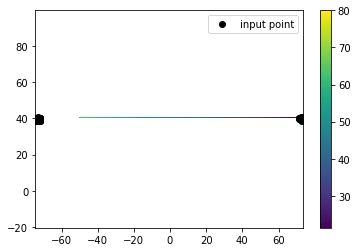

In [177]:
from scipy.interpolate import LinearNDInterpolator
cp, cplat, cplon
x = cplon

y = cplat

z = cp

X = np.linspace(min(x), max(x))

Y = np.linspace(min(y), max(y))

X, Y = np.meshgrid(X, Y)  # 2D grid for interpolation

interp = LinearNDInterpolator(list(zip(x, y)), z)

Z = interp(X, Y)

plt.pcolormesh(X, Y, Z,vmax = 80 )#shading='auto'

plt.plot(x, y, "ok", label="input point")

plt.legend()

plt.colorbar()

plt.axis("equal")

plt.show()

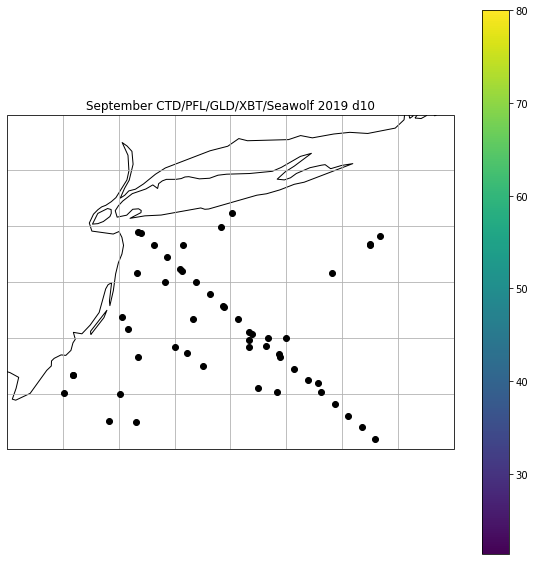

In [178]:
fig, ax = plt.subplots(figsize=(10,10), subplot_kw={'projection': ccrs.PlateCarree()})
extent = [285,289,38.5,41.5]
ax.set_extent(extent)
ax.gridlines()
ax.coastlines(resolution='50m')
C = ax.pcolormesh(X, Y, Z,vmax = 80)
C2 = ax.contour(X, Y, Z,levels=np.arange(10,100,10),colors = 'k',vmax = 80)
#ax.plot(360-X, Y, "ok", label="station")
plt.plot(x, y, "ok", label="input point")
plt.title('September CTD/PFL/GLD/XBT/Seawolf 2019 d10')
plt.colorbar(C)
plt.clabel(C2)

In [122]:
[cp12, cplat12, cplon12] = depth12(data,2019,8)

<ipython-input-132-319d200f2a21>:19: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(X, Y, Z,vmax = 80 )#shading='auto'


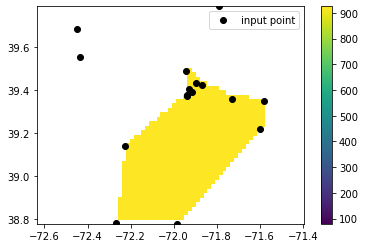

In [132]:
from scipy.interpolate import LinearNDInterpolator
cp, cplat, cplon
x = cplon

y = cplat

z = cp

X = np.linspace(min(x), max(x))

Y = np.linspace(min(y), max(y))

X, Y = np.meshgrid(X, Y)  # 2D grid for interpolation

interp = LinearNDInterpolator(list(zip(x, y)), z)

Z = interp(X, Y)

plt.pcolormesh(X, Y, Z,vmax = 80 )#shading='auto'

plt.plot(x, y, "ok", label="input point")

plt.legend()

plt.colorbar()

plt.axis("equal")

plt.show()

<ipython-input-123-0797afc98ab7>:19: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(X, Y, Z,vmax = 80 )#shading='auto'


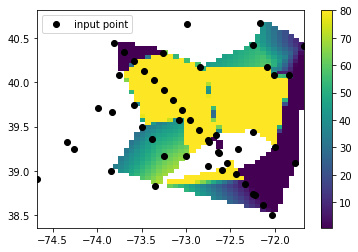

In [123]:
from scipy.interpolate import LinearNDInterpolator
cp12, cplat12, cplon12
x = cplon12

y = cplat12

z = cp12

X = np.linspace(min(x), max(x))

Y = np.linspace(min(y), max(y))

X, Y = np.meshgrid(X, Y)  # 2D grid for interpolation

interp = LinearNDInterpolator(list(zip(x, y)), z)

Z = interp(X, Y)

plt.pcolormesh(X, Y, Z,vmax = 80 )#shading='auto'

plt.plot(x, y, "ok", label="input point")

plt.legend()

plt.colorbar()

plt.axis("equal")

plt.show()

In [115]:
import cartopy.crs as ccrs
import cartopy

/Users/nyelab/miniconda3/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1478: UserWarning: No contour levels were found within the data range.
  result = matplotlib.axes.Axes.contour(self, *args, **kwargs)


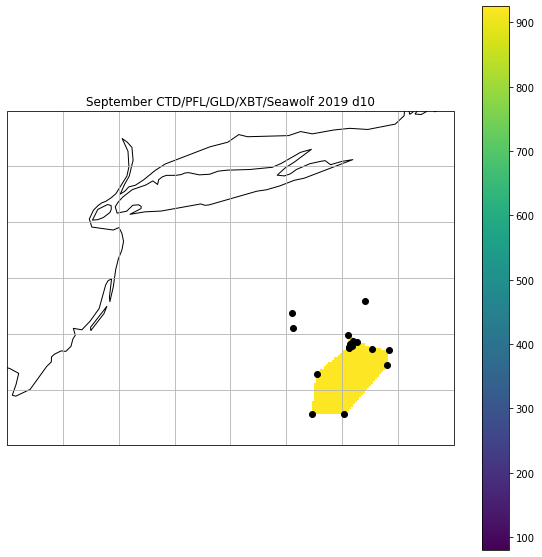

In [137]:
fig, ax = plt.subplots(figsize=(10,10), subplot_kw={'projection': ccrs.PlateCarree()})
extent = [285,289,38.5,41.5]
ax.set_extent(extent)
ax.gridlines()
ax.coastlines(resolution='50m')
C = ax.pcolormesh(X, Y, Z,vmax = 80)
C2 = ax.contour(X, Y, Z,levels=np.arange(10,100,10),colors = 'k',vmax = 80)
#ax.plot(360-X, Y, "ok", label="station")
plt.plot(x, y, "ok", label="input point")
plt.title('September CTD/PFL/GLD/XBT/Seawolf 2019 d10')
plt.colorbar(C)
plt.clabel(C2)


In [3]:
topo = xr.open_dataset('/Users/nyelab/Downloads/ETOPO1_Bed_g_gmt4.grd')


In [36]:
topo.z

<xarray.DataArray 'z' (y: 10801, x: 21601)>
[233312401 values with dtype=float64]
Coordinates:
  * x        (x) float64 -180.0 -180.0 -180.0 -179.9 ... 179.9 180.0 180.0 180.0
  * y        (y) float64 -90.0 -89.98 -89.97 -89.95 ... 89.95 89.97 89.98 90.0
Attributes:
    long_name:     z
    actual_range:  [-10898.   8271.]

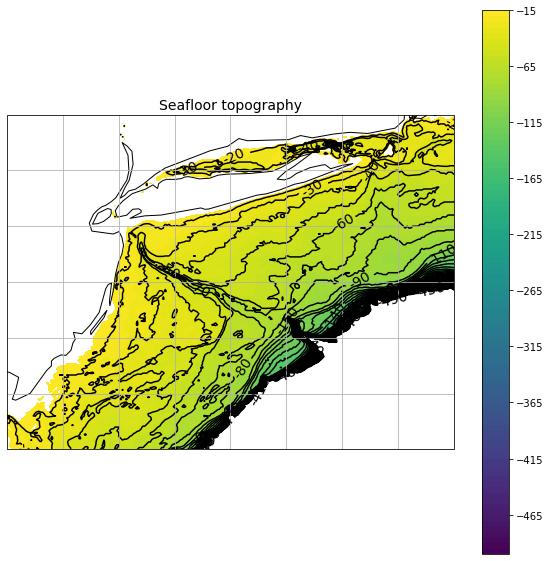

In [60]:
fig, ax = plt.subplots(figsize=(10,10), subplot_kw={'projection': ccrs.PlateCarree()})
extent = [285,289,38.5,41.5]
ax.set_extent(extent)
ax.gridlines()
ax.coastlines(resolution='50m')
#C = ax.pcolormesh(X, Y, Z,vmax = 80)
C2 = ax.contourf(topo.x[6300:6600], topo.y[7700:7890], topo.z[7700:7890,6300:6600],levels =np.arange(-500,-10,5)) #levels=np.arange(10,100,10),vmax = 80,colors = 'k'
C = ax.contour(topo.x[6300:6600], topo.y[7700:7890], topo.z[7700:7890,6300:6600],levels =np.arange(-500,-10,10),colors='k',linestyles = 'solid', linewidth = 0.25) #levels=np.arange(10,100,10),vmax = 80,colors = 'k'
#ax.plot(360-X, Y, "ok", label="station")
#plt.plot(x, y, "ok", label="input point")
plt.title('Seafloor topography', fontsize = 14)
plt.colorbar(C2)
plt.clabel(C,fmt='%1.0f',fontsize = 14)